In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
font = {'size'   : 18}
axes = {'linewidth':2,'labelpad':8.0,}
ticks={'major.size':7,'major.width':2}
plt.rc('font', **font)
plt.rc('axes',**axes)
plt.rc(['xtick','ytick'],**ticks)

In [2]:
B=['Sun','Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
dE=np.loadtxt('dE.txt')
data=[]
for i in os.listdir():
    if('fort' in i):
        data.append(np.loadtxt(i))

ecc=np.array([0.20563069,0.00677323,0.01671022,0.09341233,0.04839266,0.05415060,0.04716771,0.00858587])

In [3]:
year=86400*365.25
t_log_en=1e7/year
t_log_pos=1e5/year

In [4]:
for i,j in zip([t_log_en,t_log_pos],['Energy','Position']):
    print(j+' Logs: {:.2f} Years \ {:.2f} Months \ {:.2f} Days'.format(i,12*i,365.25*i))

Energy Logs: 0.32 Years \ 3.80 Months \ 115.74 Days
Position Logs: 0.00 Years \ 0.04 Months \ 1.16 Days


In [5]:
t_en=np.linspace(0,len(dE)*t_log_en,len(dE))
t_pos=np.linspace(0,len(data[0])*t_log_pos,len(data[0]))

In [6]:
def dist(s,p):
    dr=s-p
    d=np.sqrt(dr[:,0]**2 + dr[:,1]**2 +dr[:,2]**2)
    return(d)

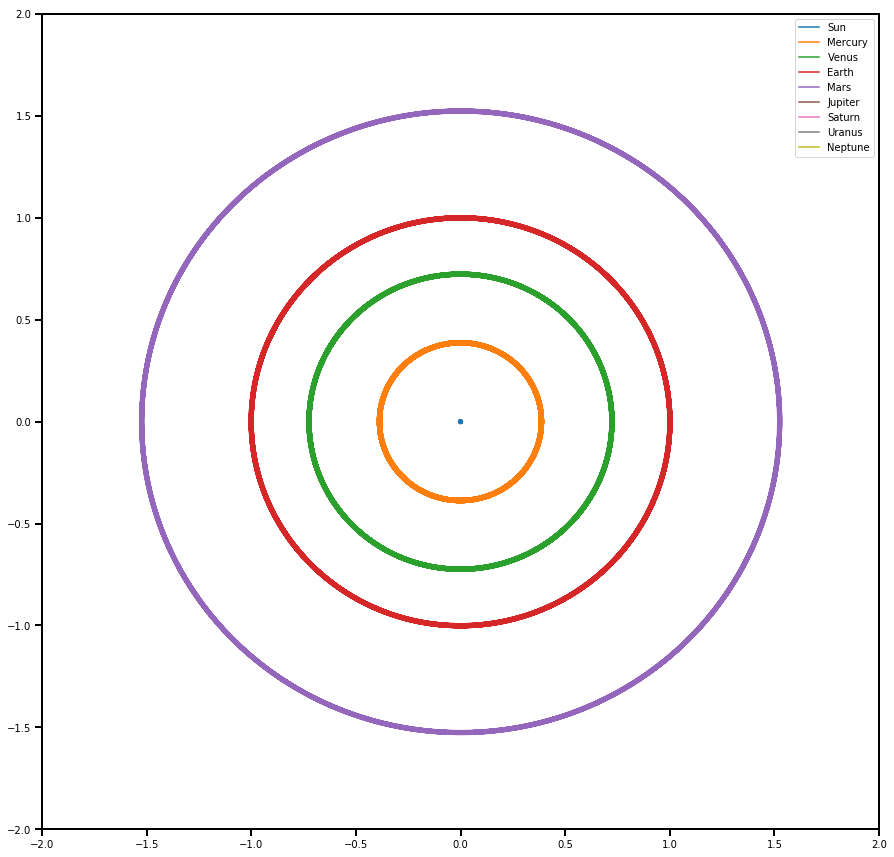

In [7]:
fig,ax=plt.subplots(figsize=(15,15))
for i in range(len(data)):
    ax.plot(data[i][:,0],data[i][:,1],label=B[i])
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

ax.legend()
plt.show()                    

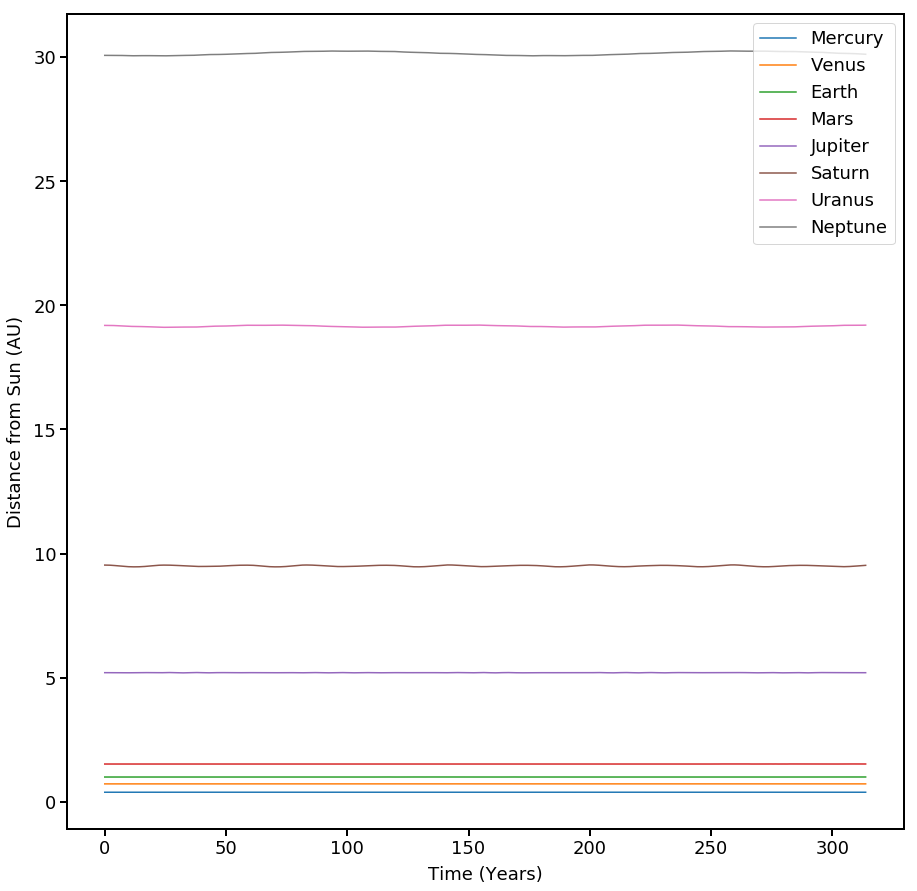

In [13]:
fig,ax=plt.subplots(figsize=(15,15))
for i in range(1,len(data)):
    ax.plot(t_pos,dist(data[0],data[i]),label=B[i])
ax.set_xlabel('Time (Years)')
ax.set_ylabel('Distance from Sun (AU)')
ax.legend()
plt.show()

In [9]:
for i in range(1,len(data)):
    d=dist(data[0],data[i])
    e=ecc[i-1]
    ed=(1-d.min()/d.max())
    print(e,ed,ed/e)

0.20563069 0.0013146501480065798 0.006393258457706774
0.00677323 0.0014243819778869682 0.2102958230987237
0.01671022 0.0013841400614315047 0.08283194724135916
0.09341233 0.001551275844352329 0.016606756777743675
0.04839266 0.002500200262355534 0.051664865340229994
0.0541506 0.008324161770442151 0.15372242912252407
0.04716771 0.004732405896614056 0.10033147457474734
0.00858587 0.00654171271038706 0.7619161145448347


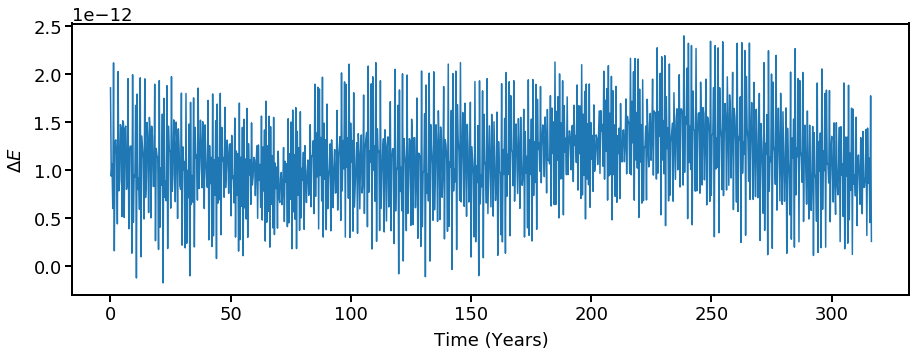

In [14]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(t_en,dE)
ax.set_xlabel('Time (Years)')
ax.set_ylabel('$\Delta E$')
plt.show()